In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy import stats
sns.set(rc={'figure.figsize':(20,10)})
plt.rcParams['figure.figsize']=10,10
%matplotlib inline

In [2]:
file_name = 'raw.csv'
df = pd.read_csv(file_name, na_values=('NA', 'Null','NULL','Na'))
file_name2 = 'flagged_orders.csv'
df_flagged = pd.read_csv(file_name2, na_values=('NA', 'Null','NULL','Na'))
file_name3 = 'compact_data.csv'
df_new = pd.read_csv(file_name3, na_values=('NA', 'Null','NULL','Na'))

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_flagged['flag'] = 'Yes'

In [17]:
df_flagged.head()

,order_external_id,flag
0,OD109568169358330000,Yes
1,OD109068694381140000,Yes
2,OD109618269608233000,Yes
3,OD109073680031644000,Yes
4,OD109069214296213000,Yes


In [38]:
df.head()

,﻿account_id,account_primary_email,account_primary_phone,act_date,address_line1,address_line2,address_pincode,analytic_category,analytic_vertical,brand,delivery_date,gmv,imei,order_date,order_external_id,order_item_id,order_item_product_id,order_item_status,order_last_payment_method,units
0,AC0A95O6H3ZTOTW88JD85JHRSCT0W3PC,butani.ritu@gmail.com,NaN,8/1/2017,Lakshmi Vishnu co-op hsg soc room no.54,NaN,413003,Mobile,Handset,Samsung,NaN,7990,354733077313565,5/15/2017,OD109164218093855000,1916421809385500,MOBECCA5Y5HBYR3Q,returned,COD,1
1,AC0A746LCP842719J1TOBI76XHGH1SPQ,05.vishal@gmail.com,+919643809479,7/21/2017,263 Jagriti Enclave Near Anand Vihar D block,Mata Katyani Mandir,110092,Mobile,Handset,Samsung,7/21/2017,16900,359106080036496,7/18/2017,OD109724804372358000,1972480437235800,MOBEV7YD3CFBTENW,delivered,NaN,1
2,AC0A1543JDYFK19Q6YLTQ7KAUAEF41D6,daramyogi@hotmail.com,+919665597358,7/14/2017,Pest Control Office M-Ward Ground Floor Barr...,NaN,400071,Mobile,Handset,Samsung,7/14/2017,15314,357956080775333,7/7/2017,OD109630282005863000,1963028200586300,MOBET6RHXVZBJFNT,delivered,NaN,1
3,AC0AAQMUVBUHPN7YCTOR1946MZ3C7EL4,avinashrk2009@gmail.com,9632554866,6/10/2017,3 6th cross malleswaram,opp city union bank,560003,Mobile,Handset,Samsung,6/10/2017,17000,357956080119946,6/8/2017,OD109377974486938000,1937797448693800,MOBET6RH4XSXKM7D,delivered,NaN,1
4,AC0ACJTJRLX09P0RVKTMRAYBNYZSFEWN,akshay.nagane@gmail.com,+918080708878,8/5/2017,B-13 Paradise Society Navapada Subhash Road Do...,Near Shiv Mandir,421202,Mobile,Handset,Samsung,8/4/2017,17040,359106080338553,8/4/2017,OD109867384084071000,1986738408407100,MOBEV7YDBCAFG3ZH,returned,NaN,1


In [4]:
df_delivered = df[df['order_item_status'] == 'delivered']
df_delivered = df_delivered[df_delivered['delivery_date'].notnull()]
df_delivered = df_delivered[df_delivered['act_date'].notnull()]

In [6]:
df_delivered.describe()

,address_pincode,gmv,imei,order_item_id,units
count,314578.000000,314578.000000,3.145780e+05,3.145780e+05,314578.000000
mean,459756.576213,10299.352507,3.573593e+14,2.271896e+15,1.000229
std,223542.056465,5120.489433,2.380896e+12,1.653864e+15,0.045386
min,110001.000000,4036.000000,3.523451e+14,1.904334e+15,1.000000
25%,302012.000000,7191.000000,3.547331e+14,1.940219e+15,1.000000
50%,474001.000000,7990.000000,3.579561e+14,1.964204e+15,1.000000
75%,641008.000000,13490.000000,3.597651e+14,1.984399e+15,1.000000
max,855116.000000,74980.000000,3.597651e+14,1.100967e+16,10.000000


In [73]:
df_delivered.head()

,﻿account_id,account_primary_email,account_primary_phone,act_date,address_line1,address_line2,address_pincode,analytic_category,analytic_vertical,brand,...,gmv,imei,order_date,order_external_id,order_item_id,order_item_product_id,order_item_status,order_last_payment_method,units,act_days
1,AC0A746LCP842719J1TOBI76XHGH1SPQ,05.vishal@gmail.com,+919643809479,2017-07-21,263 Jagriti Enclave Near Anand Vihar D block,Mata Katyani Mandir,110092,Mobile,Handset,Samsung,...,16900,359106080036496,7/18/2017,OD109724804372358000,1972480437235800,MOBEV7YD3CFBTENW,delivered,NaN,1,0
2,AC0A1543JDYFK19Q6YLTQ7KAUAEF41D6,daramyogi@hotmail.com,+919665597358,2017-07-14,Pest Control Office M-Ward Ground Floor Barr...,NaN,400071,Mobile,Handset,Samsung,...,15314,357956080775333,7/7/2017,OD109630282005863000,1963028200586300,MOBET6RHXVZBJFNT,delivered,NaN,1,0
3,AC0AAQMUVBUHPN7YCTOR1946MZ3C7EL4,avinashrk2009@gmail.com,9632554866,2017-06-10,3 6th cross malleswaram,opp city union bank,560003,Mobile,Handset,Samsung,...,17000,357956080119946,6/8/2017,OD109377974486938000,1937797448693800,MOBET6RH4XSXKM7D,delivered,NaN,1,0
6,AC0AIXYMH10QPX8HUOMRP8WZZZRF22SB,manjeetparab15290@gmail.com,+919158249540,2017-07-06,Directorate of fire and emergency services st ...,st.inez,403001,Mobile,Handset,Samsung,...,7990,357869080733691,6/30/2017,OD109568989543351000,1956898954335102,MOBEU35JAZKVWRPV,delivered,NaN,1,1
7,AC0ARQKDCMWD86LZUIHS6ZG46E4SYIAF,rao.ravichandra@gmail.com,+919908649033,2017-08-13,Assistant Professor EEE Department GNITS Shai...,NaN,500008,Mobile,Handset,Samsung,...,9891,353572081449374,8/10/2017,OD109915986603245000,1991598660324500,MOBEMJR2DRECHXWH,delivered,NaN,1,1


In [58]:
df_delivered[df_delivered['order_item_product_id']=='MOBEG4XWFTBRMMBY']['act_days'].quantile(0.5)

1.0

In [6]:
df_delivered.delivery_date.head()

1   2017-07-21
2   2017-07-14
3   2017-06-10
6   2017-07-05
7   2017-08-12
Name: delivery_date, dtype: datetime64[ns]

In [5]:
df_delivered.act_date = pd.to_datetime(df_delivered.act_date)
df_delivered.delivery_date = pd.to_datetime(df_delivered.delivery_date)
df_delivered['act_days'] = df_delivered['act_date'] - df_delivered['delivery_date']
df_delivered['act_days'] = (df_delivered['act_days']/ np.timedelta64(1, 'D')).astype(int)

In [9]:
df_delivered.act_date.isnull().sum()

0

In [6]:
df_del_grp = pd.DataFrame()
df_del_grp_units = df_delivered.groupby('order_item_product_id')['units'].sum()
df_del_grp_act_days = df_delivered.groupby('order_item_product_id')['act_days'].sum()
df_del_grp_25 = df_delivered.groupby('order_item_product_id')['act_days'].quantile(0.25)
df_del_grp_75 = df_delivered.groupby('order_item_product_id')['act_days'].quantile(0.75)
df_del_grp_50 = df_delivered.groupby('order_item_product_id')['act_days'].quantile(0.50)
df_del_grp_mode = df_delivered.groupby('order_item_product_id')['act_days'].agg([(lambda x:stats.mode(x)[0])])
#df_fsn_grp['avg_act_days'] = df_fsn_grp.act_days/df_fsn_grp.units
df_del_grp['units'] = df_del_grp_units
df_del_grp['act_days'] = df_del_grp_act_days
df_del_grp['25'] = df_del_grp_25
df_del_grp['75'] = df_del_grp_75
df_del_grp['iqr'] = df_del_grp['75']-df_del_grp['25']
df_del_grp['upper'] = df_del_grp['75']+df_del_grp['iqr']
df_del_grp['median'] = df_del_grp_50
df_del_grp['mode'] = df_del_grp_mode
df_del_grp['avg_act_days'] = df_del_grp['act_days']/df_del_grp['units']
df_del_grp.reset_index(inplace=True)

In [18]:
df_delivered[(df_delivered.order_item_product_id=='MOBEMZD4G83T5HKZ')]['act_days'].value_counts().head()

1    14
0    13
2     3
3     3
5     3
Name: act_days, dtype: int64

In [7]:
df_delivered = df_delivered.merge(df_flagged, on ='order_external_id', how='left')

In [8]:
df_delivered.drop('flag_y',inplace=True, axis=1)

ValueError: labels ['flag_y'] not contained in axis

In [9]:
df_delivered['flag'].isnull().sum(), df_delivered.order_item_id.nunique()

(290745, 314545)

In [45]:
df_delivered.head()

,﻿account_id,account_primary_email,account_primary_phone,act_date,address_line1,address_line2,address_pincode,analytic_category,analytic_vertical,brand,...,imei,order_date,order_external_id,order_item_id,order_item_product_id,order_item_status,order_last_payment_method,units,act_days,flag
0,AC0A746LCP842719J1TOBI76XHGH1SPQ,05.vishal@gmail.com,+919643809479,2017-07-21,263 Jagriti Enclave Near Anand Vihar D block,Mata Katyani Mandir,110092,Mobile,Handset,Samsung,...,359106080036496,7/18/2017,OD109724804372358000,1972480437235800,MOBEV7YD3CFBTENW,delivered,NaN,1,0,NaN
1,AC0A1543JDYFK19Q6YLTQ7KAUAEF41D6,daramyogi@hotmail.com,+919665597358,2017-07-14,Pest Control Office M-Ward Ground Floor Barr...,NaN,400071,Mobile,Handset,Samsung,...,357956080775333,7/7/2017,OD109630282005863000,1963028200586300,MOBET6RHXVZBJFNT,delivered,NaN,1,0,NaN
2,AC0AAQMUVBUHPN7YCTOR1946MZ3C7EL4,avinashrk2009@gmail.com,9632554866,2017-06-10,3 6th cross malleswaram,opp city union bank,560003,Mobile,Handset,Samsung,...,357956080119946,6/8/2017,OD109377974486938000,1937797448693800,MOBET6RH4XSXKM7D,delivered,NaN,1,0,NaN
3,AC0AIXYMH10QPX8HUOMRP8WZZZRF22SB,manjeetparab15290@gmail.com,+919158249540,2017-07-06,Directorate of fire and emergency services st ...,st.inez,403001,Mobile,Handset,Samsung,...,357869080733691,6/30/2017,OD109568989543351000,1956898954335102,MOBEU35JAZKVWRPV,delivered,NaN,1,1,NaN
4,AC0ARQKDCMWD86LZUIHS6ZG46E4SYIAF,rao.ravichandra@gmail.com,+919908649033,2017-08-13,Assistant Professor EEE Department GNITS Shai...,NaN,500008,Mobile,Handset,Samsung,...,353572081449374,8/10/2017,OD109915986603245000,1991598660324500,MOBEMJR2DRECHXWH,delivered,NaN,1,1,NaN


In [65]:
df_del_grp

,order_item_product_id,units,act_days,25,75,iqr,upper,median,mode,avg_act_days
0,MOBE5Z49WRV8M5VV,1,17,17.00,17.00,0.00,17.00,17.0,17,17.000000
1,MOBECCA5BJUVUGNP,16113,188282,1.00,17.00,16.00,33.00,2.0,1,11.685099
2,MOBECCA5FHQD43KA,66591,912351,1.00,21.00,20.00,41.00,8.0,1,13.700815
3,MOBECCA5SMRSKCNY,8664,85134,0.00,12.00,12.00,24.00,2.0,0,9.826177
4,MOBECCA5Y5HBYR3Q,31529,486794,1.00,24.00,23.00,47.00,7.0,0,15.439564
5,MOBEG4XWFTBRMMBY,11074,92826,0.00,7.00,7.00,14.00,1.0,0,8.382337
6,MOBEG4XWHJDWMQDF,5103,18824,0.00,2.00,2.00,4.00,1.0,0,3.688811
7,MOBEG4XWJG7F9A6Z,2114,13330,0.00,3.00,3.00,6.00,1.0,0,6.305582
8,MOBEMJR2DRECHXWH,7433,23229,0.00,2.00,2.00,4.00,1.0,0,3.125118
9,MOBEMJR2NDM4EAHQ,14228,36646,0.00,1.00,1.00,2.00,1.0,0,2.575626


In [10]:
df_fsn = df_delivered.groupby(['order_item_product_id','order_date','delivery_date','act_date'],as_index=False )['units','act_days'].sum()

In [11]:
df_fsn[df_fsn['act_days']>0].describe()

,units,act_days
count,61654.000000,61654.000000
mean,3.523583,38.076994
std,8.218073,89.745102
min,1.000000,1.000000
25%,1.000000,5.000000
50%,1.000000,14.000000
75%,3.000000,37.000000
max,317.000000,2448.000000


In [12]:
df_delivered[df_delivered['act_days']>0].describe()

,address_pincode,gmv,imei,order_item_id,units,act_days
count,217171.000000,217171.000000,2.171710e+05,2.171710e+05,217171.000000,217171.000000
mean,451249.515686,9714.411265,3.574486e+14,2.198999e+15,1.000332,10.809910
std,228350.654639,4694.571818,2.409226e+12,1.464692e+15,0.054624,17.367135
min,110001.000000,4036.000000,3.523451e+14,1.904334e+15,1.000000,1.000000
25%,232101.000000,6990.000000,3.547331e+14,1.931083e+15,1.000000,1.000000
50%,462001.000000,7990.000000,3.579561e+14,1.956757e+15,1.000000,3.000000
75%,641018.000000,12090.000000,3.597651e+14,1.981575e+15,1.000000,15.000000
max,855116.000000,74980.000000,3.597651e+14,1.100925e+16,10.000000,1323.000000


In [13]:
df_fsn.head()

,order_item_product_id,order_date,delivery_date,act_date,units,act_days
0,MOBE5Z49WRV8M5VV,7/17/2017,2017-07-21,2017-08-07,1,17
1,MOBECCA5BJUVUGNP,5/10/2017,2017-05-13,2017-08-14,1,93
2,MOBECCA5BJUVUGNP,5/10/2017,2017-05-15,2017-06-08,1,24
3,MOBECCA5BJUVUGNP,5/10/2017,2017-05-15,2017-06-14,1,30
4,MOBECCA5BJUVUGNP,5/10/2017,2017-05-17,2017-07-20,1,64


In [14]:
df_fsn_grp = pd.DataFrame()
df_fsn_grp_units = df_fsn.groupby('order_item_product_id')['units'].sum()
df_fsn_grp_act_days = df_fsn.groupby('order_item_product_id')['act_days'].sum()
df_fsn_grp_25 = df_fsn.groupby('order_item_product_id')['act_days'].quantile(0.25)
df_fsn_grp_75 = df_fsn.groupby('order_item_product_id')['act_days'].quantile(0.75)
df_fsn_grp_50 = df_fsn.groupby('order_item_product_id')['act_days'].quantile(0.50)
df_fsn_grp_50_2 = df_delivered.groupby('order_item_product_id')['act_days'].quantile(0.50)
df_fsn_grp_mode = df_fsn.groupby('order_item_product_id')['act_days'].agg([(lambda x:stats.mode(x))])
#df_fsn_grp['avg_act_days'] = df_fsn_grp.act_days/df_fsn_grp.units
df_fsn_grp['units'] = df_fsn_grp_units
df_fsn_grp['act_days'] = df_fsn_grp_act_days
df_fsn_grp['25'] = df_fsn_grp_25
df_fsn_grp['75'] = df_fsn_grp_75
df_fsn_grp['iqr'] = df_fsn_grp['75']-df_fsn_grp['25']
df_fsn_grp['upper'] = df_fsn_grp['75']+df_fsn_grp['iqr']
df_fsn_grp['median'] = df_fsn_grp_50
df_fsn_grp['median_2'] = df_fsn_grp_50_2
df_fsn_grp['mode'] = df_fsn_grp_mode
df_fsn_grp['avg_act_days'] = df_fsn_grp['act_days']/df_fsn_grp['units']
df_fsn_grp.reset_index(inplace=True)

In [46]:
df_fsn_grp_mode

,<lambda>
order_item_product_id,
MOBE5Z49WRV8M5VV,"([17], [1])"
MOBECCA5BJUVUGNP,"([0], [577])"
MOBECCA5FHQD43KA,"([0], [800])"
MOBECCA5SMRSKCNY,"([0], [470])"
MOBECCA5Y5HBYR3Q,"([0], [702])"
MOBEG4XWFTBRMMBY,"([0], [642])"
MOBEG4XWHJDWMQDF,"([0], [472])"
MOBEG4XWJG7F9A6Z,"([0], [321])"
MOBEMJR2DRECHXWH,"([0], [471])"


In [15]:
sum(df_fsn_grp['act_days'])/sum(df_fsn_grp['units'])

7

In [55]:
#df_fsn_grp.sort('units', ascending=False)
df_fsn_grp

,order_item_product_id,units,act_days,25,75,iqr,upper,median,median_2,mode,avg_act_days
0,MOBE5Z49WRV8M5VV,1,17,17.00,17.00,0.00,17.00,17.0,17.0,"([17], [1])",17.000000
1,MOBECCA5BJUVUGNP,16113,188282,4.00,44.00,40.00,84.00,16.0,2.0,"([0], [577])",11.685099
2,MOBECCA5FHQD43KA,66591,912351,8.00,80.00,72.00,152.00,29.0,8.0,"([0], [800])",13.700815
3,MOBECCA5SMRSKCNY,8664,85134,3.00,31.00,28.00,59.00,12.0,2.0,"([0], [470])",9.826177
4,MOBECCA5Y5HBYR3Q,31529,486794,6.00,66.00,60.00,126.00,23.0,7.0,"([0], [702])",15.439564
5,MOBEG4XWFTBRMMBY,11074,92826,2.00,28.00,26.00,54.00,8.0,1.0,"([0], [642])",8.382337
6,MOBEG4XWHJDWMQDF,5103,18824,1.00,9.00,8.00,17.00,3.0,1.0,"([0], [472])",3.688811
7,MOBEG4XWJG7F9A6Z,2114,13330,0.00,10.00,10.00,20.00,2.0,1.0,"([0], [321])",6.305582
8,MOBEMJR2DRECHXWH,7433,23229,0.00,13.00,13.00,26.00,3.0,1.0,"([0], [471])",3.125118
9,MOBEMJR2NDM4EAHQ,14228,36646,1.00,12.00,11.00,23.00,5.0,1.0,"([0], [753])",2.575626


In [115]:
df_fsn_grp.to_csv('output.csv')

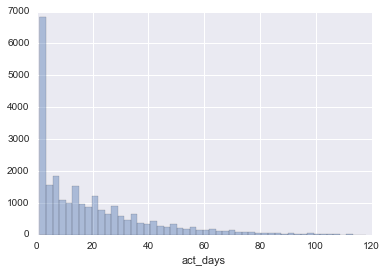

In [130]:
plt.figure()
sns.distplot(df_delivered[(df_delivered.order_item_product_id =='MOBECCA5Y5HBYR3Q')&(df_delivered.act_days<150) & 
                          (df_delivered.act_days>0)]['act_days'], bins = 50, kde=False)


In [132]:
df_delivered[df_delivered.order_item_product_id=='MOBECCA5Y5HBYR3Q'].to_csv('check.csv')

In [48]:
df_delivered[(df_delivered.order_item_product_id=='MOBECCA5Y5HBYR3Q') & (df_delivered.act_days>15)].describe()

,address_pincode,gmv,imei,order_item_id,units,act_days
count,11362.000000,11362.000000,1.136200e+04,1.136200e+04,11362,11362.000000
mean,388089.510385,7912.096726,3.547331e+14,1.932554e+15,1,36.528868
std,247927.358880,254.021255,1.945767e+05,2.166365e+13,0,19.745893
min,110001.000000,6716.000000,3.547331e+14,1.904334e+15,1,16.000000
25%,124112.000000,7690.000000,3.547331e+14,1.916898e+15,1,22.000000
50%,400033.000000,7990.000000,3.547331e+14,1.919641e+15,1,31.000000
75%,585101.000000,7990.000000,3.547331e+14,1.942860e+15,1,46.000000
max,854318.000000,8590.000000,3.547331e+14,1.993124e+15,1,568.000000


In [ ]:
df_fsn

In [ ]:
df_fsn[(df_fsn.order_item_product_id=='MOBECCA5BJUVUGNP')]['units'].value_counts()

In [16]:
df_reseller = df_delivered[df_delivered['flag']=='Yes']
df_nonreseller = df_delivered[df_delivered['flag'].isnull()]

In [17]:
df_reseller.order_item_id.count(),df_reseller.order_item_id.nunique(), df_nonreseller.order_external_id.count()

(26553, 23829, 290745)

In [18]:
df_delivered.order_item_id.count(), df_delivered.order_item_id.nunique()

(317298, 314545)

In [19]:
df_new.order_item_id.count(), df_new.order_item_id.nunique()

(422782, 422692)

In [28]:
df_new[df_new['act_days']<0]['order_item_id'].nunique()

5133

In [29]:
df_new[df_new['act_days']>18]['order_item_id'].nunique()

42969

In [21]:
df_new.Flag.value_counts()

No     398506
Yes     24276
Name: Flag, dtype: int64

In [22]:
df_new_delivered = df_new[df_new['order_item_status']=='delivered']
df_new_delivered_flagged = df_new_delivered[df_new_delivered['Flag']=='Yes']
df_new_delivered_not_flagged = df_new_delivered[df_new_delivered['Flag']=='No']

In [31]:
df_new_delivered.describe()

,act_days,address_pincode,gmv,imei,order_item_id,units
count,314624.000000,315575.000000,315575.000000,3.155750e+05,3.155750e+05,315575.000000
mean,7.177237,459534.376998,10345.616225,3.564269e+14,2.270974e+15,1.000228
std,15.170327,223547.075884,5206.057212,1.720594e+13,1.651331e+15,0.045314
min,-175.000000,110001.000000,4036.000000,1.840184e+13,1.904334e+15,1.000000
25%,0.000000,302006.000000,7193.000000,3.547331e+14,1.940298e+15,1.000000
50%,1.000000,474001.000000,7990.000000,3.579561e+14,1.964360e+15,1.000000
75%,7.000000,641006.000000,13490.000000,3.597651e+14,1.984478e+15,1.000000
max,1323.000000,855116.000000,74980.000000,3.597651e+14,1.100967e+16,10.000000


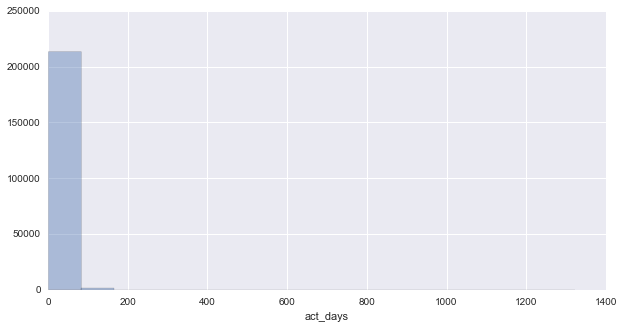

In [39]:
plt.figure()
sns.distplot(df_new_delivered[df_new_delivered.act_days>0]['act_days'], bins = 16, kde=False)

In [32]:
df_new_delivered.Flag.value_counts()

No     291731
Yes     23844
Name: Flag, dtype: int64

In [24]:
df_new_delivered_flagged.describe()

,act_days,address_pincode,gmv,imei,order_item_id,units
count,23843.000000,23844.000000,23844.000000,2.384400e+04,2.384400e+04,23844
mean,20.569098,377485.906308,7933.860189,3.576859e+14,2.000438e+15,1
std,20.009432,255641.262493,2685.755634,3.234265e+12,7.095502e+14,0
min,-57.000000,110001.000000,4990.000000,3.592008e+13,1.904760e+15,1
25%,6.000000,122050.000000,6690.000000,3.547331e+14,1.917978e+15,1
50%,16.000000,380052.000000,6990.000000,3.597651e+14,1.941994e+15,1
75%,29.000000,635613.750000,7990.000000,3.597651e+14,1.967850e+15,1
max,900.000000,854318.000000,74900.000000,3.597651e+14,1.100940e+16,1


In [111]:
df_new_delivered_flagged.act_days.dtype

dtype('float64')

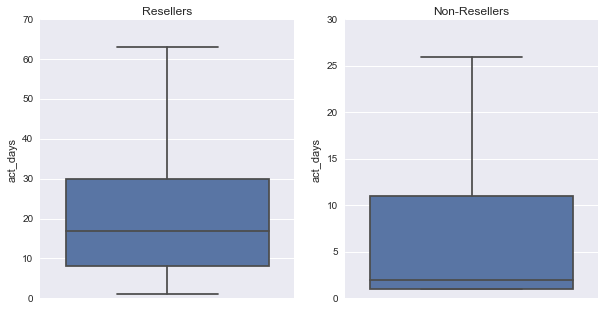

In [27]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df_new_delivered_flagged[df_new_delivered_flagged['act_days']>0]['act_days'],orient = 'v', 
            showfliers = False, ax = ax[0]).set_title('Resellers')
sns.boxplot(df_new_delivered_not_flagged[df_new_delivered_not_flagged['act_days']>0]['act_days'],orient = 'v', 
            showfliers = False, ax = ax[1]).set_title('Non-Resellers')
fig.show()

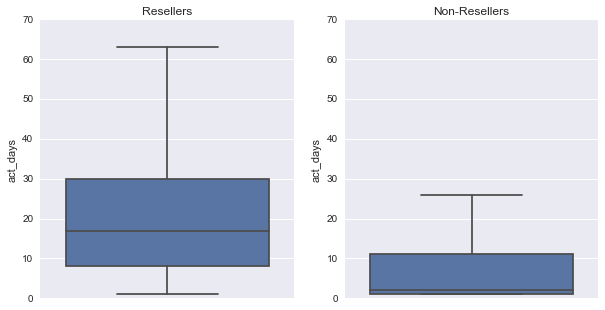

In [54]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df_new_delivered_flagged[df_new_delivered_flagged['act_days']>0]['act_days'],orient = 'v', 
            showfliers = False, ax = ax[0]).set_title('Resellers')
ax = sns.boxplot(df_new_delivered_not_flagged[df_new_delivered_not_flagged['act_days']>0]['act_days'],orient = 'v', 
            showfliers = False, ax = ax[1])
ax.set_ylim([0,70])
ax.set_title('Non-Resellers')
 
fig.show()

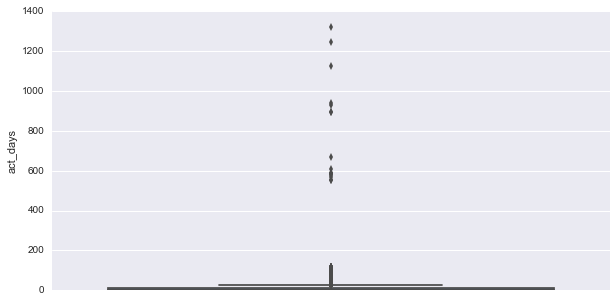

In [129]:
plt.figure()
sns.boxplot(df_new_delivered_not_flagged[df_new_delivered_not_flagged['act_days']>0]['act_days'],orient = 'v')

In [43]:
df_new_delivered[df_new_delivered['act_days']>12]['order_item_id'].nunique()

59255

In [26]:
plt.rcParams['figure.figsize']=(10,5)

In [131]:
df_new_delivered_flagged.act_days.value_counts()

 1      1363
 0      1325
 2       829
 3       749
 5       646
 4       636
 8       618
 6       614
 9       610
 11      606
 16      602
 17      589
 7       584
 15      583
 10      575
 12      569
 13      568
 18      567
 14      561
 19      551
 20      542
 21      466
 22      414
 23      407
 24      402
 26      375
 27      370
 25      368
 28      363
 31      351
        ... 
 107       5
 109       5
-5         5
-3         4
 111       4
 104       3
-12        3
 110       3
 113       3
-8         3
-11        3
 116       2
-7         2
-57        2
-31        2
-9         2
 112       2
-15        2
 108       1
 114       1
-13        1
 115       1
-28        1
-30        1
-36        1
 900       1
 119       1
 118       1
 117       1
-17        1
Name: act_days, dtype: int64

In [127]:
df_new_delivered_not_flagged[df_new_delivered_not_flagged['act_days']>12].to_csv('non_resellers.csv')